### Import Packages

In [1]:
 # you only need to install once !
# !pip install spotipy
# pip install yfinance

In [3]:
import requests
import pandas as pd
# !pip install spotipy  # you only need to install once !
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Part 1: Leverage the lecture code to answer these questions

1. Use the BLS Data Finder 1.1 available [here](https://beta.bls.gov/dataQuery/find?st=0&r=20&more=0) to import a BLS variable/field (using the BLS web API) of your choosing.

In [19]:
# BLS API v1 url
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [31]:
# BLS series id for the Average hourly earnings of all employees (total private)
series = {'id': 'APU000074714',
          'name': 'Average Hourly Earnings of all Private Employees'}

In [33]:
# Combine the base url and series id into a single string which is the API url with data. 
# Print a link to the data.
data_url = '{}{}'.format(base_url, series['id'])
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/APU000074714


In [35]:
r = requests.get(data_url).json()
print('Status: ' + r['status'])

Status: REQUEST_NOT_PROCESSED


In [37]:
print(r.keys()) # The results key has the data we want

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [39]:
r = r['Results']['series'][0]['data']
print(r[0])

KeyError: 'series'

In [41]:
# Reformat to a pandas object
dates = ['{} {}'.format(i['period'][1:], i['year']) for i in r]
index = pd.to_datetime(dates)
data = {series['id']: [float(i['value']) for i in r],
        'footnotes': [i['footnotes'][0] for i in r]}

df = pd.DataFrame(index=index, data=data).iloc[::-1]

df.head()

TypeError: string indices must be integers, not 'str'

In [43]:
# Calculate the average value for the period and plot both the monthly values and average value to look for trends
df['mean'] = df[series['id']].mean()
df[[series['id'], 'mean']].plot(title=series['name'])
plt.show()

NameError: name 'df' is not defined

2. Using the BLS web API, create your own custom function which can interact with the BLS web API. Your function should take three input parameters: name base_url_in, series_in, and title_in and return the relevant data series as a pd.DataFrame object. Test your function by replicating the GET request you sent above for #1.

In [46]:
# Create a function to import the data
def create_api_df(base_url_in, series_in, title_in):
    tmp_series = {'id': series_in,
                  'name': title_in}
    tmp_data_url = '{}{}'.format(base_url_in, tmp_series['id'])
    #tmp_r = requests.get(tmp_data_url).json()
    #tmp_r = tmp_r['Results']['series'][0]['data']
    
    # Reformat to a pandas object
    dates = ['{} {}'.format(i['periodName'], i['year']) for i in r]
    index = pd.to_datetime(dates)
    data = {series['id']: [float(i['value']) for i in r]}

    tmp_df = pd.DataFrame(index=index, data=data).iloc[::-1]
    print(title_in)
    return tmp_df

In [48]:
# Create a function to import the data
def create_api_df(base_url_in, series_in, title_in):
    tmp_series = {'id': series_in,
                  'name': title_in}
    tmp_data_url = '{}{}'.format(base_url_in, tmp_series['id'])
    tmp_r = requests.get(tmp_data_url).json()
    tmp_r = tmp_r['Results']['series'][0]['data']
    
    # Reformat to a pandas object
    dates = ['{} {}'.format(i['periodName'], i['year']) for i in tmp_r]
    index = pd.to_datetime(dates)
    data = {series['id']: [float(i['value']) for i in tmp_r]}

    tmp_df = pd.DataFrame(index=index, data=data).iloc[::-1]
    print(title_in)
    return tmp_df

dat = create_api_df(base_url, 'CES0500000003', 'Average Hourly Earnings of all Private Employees')
dat

KeyError: 'series'

3. Go to these three links: [link1](https://beta.bls.gov/dataViewer/view/timeseries/APU0000709112), [link2](https://beta.bls.gov/dataViewer/view/timeseries/APU000074714), [link3](https://beta.bls.gov/dataViewer/view/timeseries/APU0000708111). On these webpages, you will see three different time series data sets. For each, you will also see both a Series Title and ID. Using the function you wrote to fetch data from the BLS web API, import these data sets into Python as three separate `pd.Data.Frame` objects.

In [31]:
# Link 1
milk_df = create_api_df(base_url,'APU0000709112','Milk, fresh, whole, fortified, per gal.')
milk_df.head()

Milk, fresh, whole, fortified, per gal.


C:\Users\nicho\AppData\Local\Temp\ipykernel_16868\4201150701.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  index = pd.to_datetime(dates)


,CES0500000003
2023-01-01,4.204
2023-02-01,4.163
2023-03-01,4.098
2023-04-01,4.042
2023-05-01,4.042


In [33]:
# Link 2
gas_df = create_api_df(base_url,'APU000074714','Gasoline, unleaded regular, per gallon')
gas_df.head()

Gasoline, unleaded regular, per gallon


C:\Users\nicho\AppData\Local\Temp\ipykernel_16868\4201150701.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  index = pd.to_datetime(dates)


,CES0500000003
2023-01-01,3.452
2023-02-01,3.514
2023-03-01,3.551
2023-04-01,3.735
2023-05-01,3.685


In [35]:
# Link 3
egg_df = create_api_df(base_url,'APU0000708111','Eggs, grade A, large, per doz.')
egg_df.head()

Eggs, grade A, large, per doz.


C:\Users\nicho\AppData\Local\Temp\ipykernel_16868\4201150701.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  index = pd.to_datetime(dates)


,CES0500000003
2023-01-01,4.823
2023-02-01,4.211
2023-03-01,3.446
2023-04-01,3.270
2023-05-01,2.666


4. Merge the data sets together into a single ```pd.DataFrame``` and make a time series plot showing how the CPI for these three goods has changed over the last 24 months. Each good should be shown as a unique line with different coloring/patterns and a matching legend (I suggest using the ```matplotlib``` library to do this).

In [38]:
# Merge the datasets
df_1 = pd.merge(milk_df, gas_df, left_index=True, right_index=True)
cpi_df = pd.merge(df_1, egg_df, left_index=True, right_index=True)
cpi_df = cpi_df.rename(columns={'APU0000709112': 'Milk, fresh, whole, fortified, per gal.',
                                'APU000074714': 'Gasoline, unleaded regular, per gallon', 
                                'APU0000708111': 'Eggs, grade A, large, per doz.'})
cpi_df.head()

,CES0500000003_x,CES0500000003_y,CES0500000003
2023-01-01,4.204,3.452,4.823
2023-02-01,4.163,3.514,4.211
2023-03-01,4.098,3.551,3.446
2023-04-01,4.042,3.735,3.270
2023-05-01,4.042,3.685,2.666


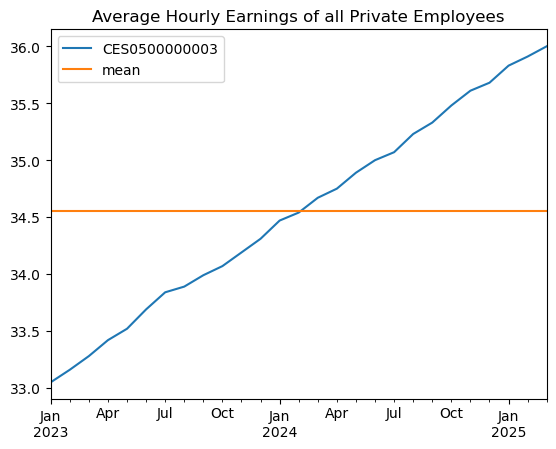

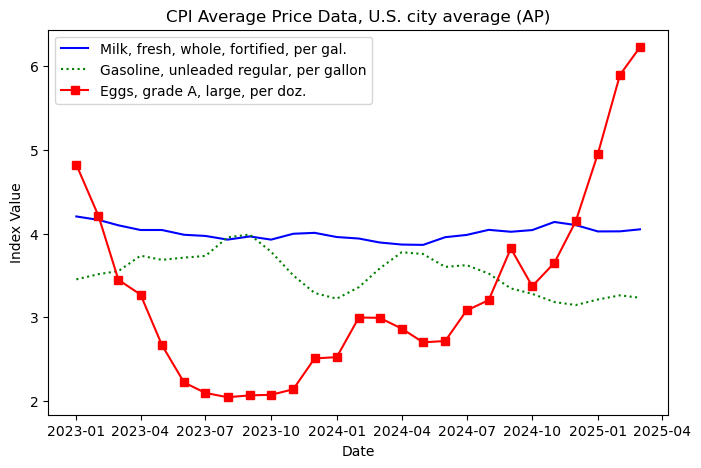

In [40]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(cpi_df.index, cpi_df.iloc[:,0], color='blue', label='Milk, fresh, whole, fortified, per gal.')
plt.plot(cpi_df.index, cpi_df.iloc[:,1], color='green', ls = 'dotted',
         label='Gasoline, unleaded regular, per gallon')
plt.plot(cpi_df.index, cpi_df.iloc[:,2], color='red', marker='s', label='Eggs, grade A, large, per doz.')
plt.title('CPI Average Price Data, U.S. city average (AP)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()

5. In the lecture notes, refer to the section entitled "No Python Package? Manipulate URL directly". Can you update the code in the New York Times article search API URL so that you return article data for Hillary Clinton for the time range April 1, 2024 - April 4, 2024? How many TOTAL articles were returned by this API search?

In [52]:
# Conduct an  article search for Hillary Clinton from
# begin_date = "20220801" to end_date = '20221231'

# Create different parts of the final URL, then combine them together
article_key = "Dh5ALRSh2qe7I7FhAAj8VHxwcVO9FFy8"
term = 'Hillary+Clinton' # Need to use + to string together separate words for multiple terms
#begin_date = "20220328" # 03/28/22 had 0 hits on NYT for Hillary Clinton
begin_date = "20240401" 
end_date = "20240404"

In [54]:
finalurl = "http://api.nytimes.com/svc/search/v2/articlesearch.json?q=" + term + "&begin_date=" + begin_date + "&end_date=" + end_date + "&api-key=" + article_key

In [56]:
finalurl

'http://api.nytimes.com/svc/search/v2/articlesearch.json?q=Hillary+Clinton&begin_date=20240401&end_date=20240404&api-key=Dh5ALRSh2qe7I7FhAAj8VHxwcVO9FFy8'

In [58]:
r_1 = requests.get(finalurl)
r_1 = r_1.json()
print(r_1.keys())

dict_keys(['status', 'copyright', 'response'])


In [59]:
data_1 = pd.DataFrame(r_1['response']['docs'])
print(data_1.shape)   # look at dim of data
print(data_1.columns) # look at columns
data_1[data_1['document_type']=='article']

(5, 19)
Index(['abstract', 'byline', 'document_type', 'headline', '_id', 'keywords',
       'multimedia', 'news_desk', 'print_page', 'print_section', 'pub_date',
       'section_name', 'snippet', 'source', 'subsection_name',
       'type_of_material', 'uri', 'web_url', 'word_count'],
      dtype='object')


,abstract,byline,document_type,headline,_id,keywords,multimedia,news_desk,print_page,print_section,pub_date,section_name,snippet,source,subsection_name,type_of_material,uri,web_url,word_count
0,Inside the notorious “catch and kill” campaign...,{'original': 'By Lachlan Cartwright'},article,{'main': 'What I Saw Working at The National E...,nyt://article/3211e3f0-4388-5f19-884b-051e5821...,"[{'name': 'Organization', 'value': 'National E...","{'caption': '', 'credit': 'Photo illustration ...",Magazine,26,MM,2024-04-03T09:04:03Z,Magazine,Inside the notorious “catch and kill” campaign...,The New York Times,,News,nyt://article/3211e3f0-4388-5f19-884b-051e5821...,https://www.nytimes.com/2024/04/03/magazine/na...,6394
1,Oren Etzioni was once an optimist about artifi...,{'original': 'By Cade Metz and Tiffany Hsu'},article,{'main': 'An A.I. Researcher Takes On Election...,nyt://article/e75ea126-164f-5942-a86a-4781dfdd...,"[{'name': 'Subject', 'value': 'Artificial Inte...",{'caption': 'Oren Etzioni at The AI Institute....,Business,1,B,2024-04-02T16:00:12Z,Technology,Oren Etzioni was once an optimist about artifi...,The New York Times,,News,nyt://article/e75ea126-164f-5942-a86a-4781dfdd...,https://www.nytimes.com/2024/04/02/technology/...,1089
2,Simon Rosenberg has spent the past two years t...,{'original': 'By Adam Nagourney'},article,{'main': 'Many Democrats Are Worried Trump Wil...,nyt://article/58c63816-3116-5608-b18d-878e39eb...,"[{'name': 'Person', 'value': 'Biden, Joseph R ...","{'caption': 'Simon Rosenberg, a Democratic str...",Politics,18,A,2024-04-03T18:26:38Z,U.S.,Simon Rosenberg has spent the past two years t...,The New York Times,Politics,News,nyt://article/58c63816-3116-5608-b18d-878e39eb...,https://www.nytimes.com/2024/04/03/us/politics...,1754
3,He oversaw design of new ballparks for the Bal...,{'original': 'By Richard Sandomir'},article,"{'main': 'Larry Lucchino, Top Executive at Thr...",nyt://article/47823689-65b3-5250-ba60-8c10cff9...,"[{'name': 'Subject', 'value': 'Deaths (Obituar...",{'caption': 'Larry Lucchino in 2008 as preside...,Obits,11,B,2024-04-02T16:23:20Z,Sports,He oversaw design of new ballparks for the Bal...,The New York Times,Baseball,Obituary (Obit),nyt://article/47823689-65b3-5250-ba60-8c10cff9...,https://www.nytimes.com/2024/04/02/sports/base...,1285
4,Long before the killings of seven workers in G...,{'original': 'By Kim Severson'},article,{'main': 'How José Andrés and His Corps of Coo...,nyt://article/5b4d71e7-2855-534f-b725-7cfd9c88...,"[{'name': 'Person', 'value': 'Andres, Jose (19...","{'caption': 'José Andrés, the Spanish chef who...",Dining,9,A,2024-04-02T22:31:38Z,Food,Long before the killings of seven workers in G...,The New York Times,,News,nyt://article/5b4d71e7-2855-534f-b725-7cfd9c88...,https://www.nytimes.com/2024/04/02/dining/jose...,1456


The API search for Hillary Clinton in the date range April 1, 2024 - April 4, 2024 results were shown above. As we can see, there are 5 articles which referenced Hillary Clinton in this time frame.

### Part 2: Connect to other APIs

6. In this question, we will connect to the Spotify API. Spotify has a package called ```spotipy``` which makes this easy. Using [this](https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50) online tutorial, import a list of the top 50 global tracks (as listed on Spotify's Global top songs playlist). **Do not embed your client_id and client_secret information in the code that you submit.** As the tutorial suggests, save those in a separate python file and import them as the variables cid and client_secret so that they are masked from us when you submit your assignment.

*Hint: There's two things you need know: (1) You'll have to modify the code from this online tutorial slightly to answer the question and (2) you'll need an authenticated Spotify account. You can use your own Spotify account details if you have your own account. Or, I made a free account which you can use to answer this problem. The details for which are below.*

```cid='1d79c7320efe48be8555674d48a7fd2d'``` ```secret='34a7cabc5f624302b9bb25c29d1c8057'```

In [64]:
# Packages loaded at top of notebook

In [66]:
# Load credentials (from free account above)
cid = '1d79c7320efe48be8555674d48a7fd2d'
client_secret= '34a7cabc5f624302b9bb25c29d1c8057'

In [68]:
# Authenticate credentials
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [70]:
album_id = "https://open.spotify.com/album/6a8nlV9V8kPUbTTCJNVSsh"
queen_album = sp.album(album_id, market=None)
type(queen_album)

dict

In [78]:
# The next several cells export the nature of this data object, building up to the for loop which fully extracts the data elements we asked about
queen_album.keys()

dict_keys(['album_type', 'total_tracks', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'type', 'uri', 'artists', 'tracks', 'copyrights', 'external_ids', 'genres', 'label', 'popularity'])

In [80]:
queen_album['available_markets']

['CA', 'US']

In [82]:
queen_album['total_tracks']

17

In [84]:
queen_album['tracks']

{'href': 'https://api.spotify.com/v1/albums/6a8nlV9V8kPUbTTCJNVSsh/tracks?offset=0&limit=50',
 'limit': 50,
 'next': None,
 'offset': 0,
 'previous': None,
 'total': 17,
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg1d'},
     'href': 'https://api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLkxsg1d',
     'id': '1dfeR4HaWDbWqFHLkxsg1d',
     'name': 'Queen',
     'type': 'artist',
     'uri': 'spotify:artist:1dfeR4HaWDbWqFHLkxsg1d'}],
   'available_markets': ['CA', 'US'],
   'disc_number': 1,
   'duration_ms': 355466,
   'explicit': False,
   'external_urls': {'spotify': 'https://open.spotify.com/track/6ljkRMigoNtu0x1mlTEsKc'},
   'href': 'https://api.spotify.com/v1/tracks/6ljkRMigoNtu0x1mlTEsKc',
   'id': '6ljkRMigoNtu0x1mlTEsKc',
   'name': 'Bohemian Rhapsody - Remastered 2011',
   'preview_url': None,
   'track_number': 1,
   'type': 'track',
   'uri': 'spotify:track:6ljkRMigoNtu0x1mlTEsKc',
   'is_local': False},
  {'artists': 

In [86]:
track_num = 0
for track in queen_album['tracks']['items']:
    track_num += 1
    print(np.where(track_num <= 9, "Track  ", "Track "), str(track_num), " is ", track['name'])

Track   1  is  Bohemian Rhapsody - Remastered 2011
Track   2  is  Another One Bites The Dust - Remastered 2011
Track   3  is  Killer Queen - Remastered 2011
Track   4  is  Fat Bottomed Girls - Single Version / Remastered 2011
Track   5  is  Bicycle Race - Remastered 2011
Track   6  is  You're My Best Friend - Remastered 2011
Track   7  is  Don't Stop Me Now - Remastered 2011
Track   8  is  Save Me - Remastered 2011
Track   9  is  Crazy Little Thing Called Love - Remastered 2011
Track  10  is  Somebody To Love - Remastered 2011
Track  11  is  Now I'm Here - Remastered 2011
Track  12  is  Good Old-Fashioned Lover Boy - Remastered 2011
Track  13  is  Play The Game - Remastered 2011
Track  14  is  Flash - Remastered 2011
Track  15  is  Seven Seas Of Rhye - Remastered 2011
Track  16  is  We Will Rock You - Remastered 2011
Track  17  is  We Are The Champions - Remastered 2011


7. Find an API of interest to you. Sign up for an API key if necessary. Describe the API concisely and make a single call on the API and return an example of the returned data here.

The **Yahoo Finance API** allows users to search for financial and company data published on Yahoo Finance. Potential searches include: company information, stock prices, corporate actions, and earnings history. The API also includes functions like `yfinance.Ticker()`, which allows users to access publicly-traded company data more easily through the company's stock ticker symbol.

In [90]:
# Company selected - BlackRock
blk = yf.Ticker("BLK")

# Get all stock info
blk.info

{'address1': '50 Hudson Yards',
 'city': 'New York',
 'state': 'NY',
 'zip': '10001',
 'country': 'United States',
 'phone': '212 810 5300',
 'website': 'https://www.blackrock.com',
 'industry': 'Asset Management',
 'industryKey': 'asset-management',
 'industryDisp': 'Asset Management',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'BlackRock, Inc. is a privately owned investment manager. The firm primarily provides its services to institutional, intermediary, and individual investors including corporate, public, union, and industry pension plans, insurance companies, third-party mutual funds, endowments, public institutions, governments, foundations, charities, sovereign wealth funds, corporations, official institutions, and banks. It also provides global risk management and advisory services. The firm manages separate client-focused equity, fixed income, and balanced portfolios. It also launches and m

In [92]:
# Get historical stock data
hist = blk.history(period="1mo")
hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-17 00:00:00-04:00,937.130005,960.940002,933.369995,958.000000,922300,0.0,0.0
2025-03-18 00:00:00-04:00,957.630005,964.570007,956.010010,958.619995,1086200,0.0,0.0
2025-03-19 00:00:00-04:00,959.679993,966.000000,951.000000,957.229980,1086700,0.0,0.0
2025-03-20 00:00:00-04:00,952.690002,961.630005,949.520020,954.169983,667900,0.0,0.0
2025-03-21 00:00:00-04:00,948.000000,956.340027,938.169983,951.729980,5211600,0.0,0.0
2025-03-24 00:00:00-04:00,960.650024,972.989990,957.000000,963.500000,640000,0.0,0.0
2025-03-25 00:00:00-04:00,970.479980,977.280029,961.859985,973.479980,566700,0.0,0.0
2025-03-26 00:00:00-04:00,975.000000,980.200012,964.000000,968.239990,667600,0.0,0.0
2025-03-27 00:00:00-04:00,965.510010,976.799988,957.500000,967.940002,479100,0.0,0.0


Q.1-10

Q.2-10

Q.3-10

Q.4-10

Q.5-10

Q.6-25

Q.7-25


8. Import the data found in the HW5 folder. It is a single column of data that has 500 rows. This data represents a format of data that you will often encounter in reserach projects which use "thematic coding" for text response data. As described [here](https://www.betterevaluation.org/methods-approaches/methods/thematic-coding): "Thematic coding is a form of qualitative analysis that involves recording or identifying passages of text or images that are linked by a common theme or idea allowing you to index the text into categories and therefore establish a 'framework of thematic ideas about it' (Gibbs 2007)." 

It is ok if you are not familiar with thematic coding for qualitative/text data. Your task is to import the data and write a regex that is capable of finding the thematic code "1" whenever it appears in the string. This is more difficult than it sounds, because your regex should count all the "1"s that appear, but not "10", "11", "12", "21" etc. Also note, that sometimes "1" appears in the 2nd, 3rd… etc. position (e.g., "2, 6, 7, 1, 10"). Use this regex to add a new column to your dataset called "find_1". Display a frequency table showing the number of times your regex flagged "1" as appearing.

In [96]:
file = r"C:\Users\nicho\OneDrive\Desktop\MDS\QMSS-GR5072-Spring2025-HWs\homework-5-main\data\Thematic codes data.csv"
df = pd.read_csv(file)
df

,Thematic codes
0,"1, 16"
1,1
2,0
3,0
4,0
...,...
495,24
496,"8, 24"
497,"2, 8, 9, 16, 21"
498,"4, 8"


In [98]:
import re 
df["find_1"] = df['Thematic codes'].str.contains("\\b1\\b")
df.find_1.value_counts()

find_1
False    437
True      63
Name: count, dtype: int64

In [103]:
# Check your work !
df.to_csv(r"C:\Users\nicho\OneDrive\Desktop\MDS\QMSS-GR5072-Spring2025-HWs\homework-5-main\data\check.csv")

In [105]:
# You can also ask chat GPT ! It gave me this crazier answer, but it worked 
df["find_2"] = df['Thematic codes'].str.contains("(?<!\d)(1(?![0-9])|(?<!\d),1(?!$))(?!\d)")
df.find_2.value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nicho\AppData\Local\Temp\ipykernel_1332\2896106094.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["find_2"] = df['Thematic codes'].str.contains("(?<!\d)(1(?![0-9])|(?<!\d),1(?!$))(?!\d)")
C:\Users\nicho\AppData\Local\Temp\ipykernel_1332\2896106094.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["find_2"] = df['Thematic codes'].str.contains("(?<!\d)(1(?![0-9])|(?<!\d),1(?!$))(?!\d)")


find_2
False    437
True      63
Name: count, dtype: int64